# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

In [32]:
! git clone https://github.com/ds3001f25/eda_assignment.git
import pandas as pd
import numpy as np
import seaborn as sns

fatal: destination path 'eda_assignment' already exists and is not an empty directory.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [ ]:
#Q1, picture of work on github

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [12]:
#2.
airbnb_df = pd.read_csv('eda_assignment/data/airbnb_hw.csv',low_memory=False)
rows = airbnb_df.shape[0]
columns = airbnb_df.shape[1]
print("There are", rows, "rows and", columns, 'columns')
airbnb_df.head()
#So, there are 30478 observations, each with (including missing data) 13 variables: Host Id, Host Since, Name, Neighborhood, Property Type,
#Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating

There are 30478 rows and 13 columns


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [11]:
#3
pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])
#It seems that it's not very common in any property type to share a room. In fact, there is only one property type (Treehouse) where it is the most
#common option. In some of the property types, it's more common to rent a private room than rent the whole home: B&B, Castle, Chalet, Dorm, House, Hut
#Other, Tent, and Treehouse. This is probably because these are bigger spaces and if you are only one or 2 people, you won't need the whole thing. In
#smaller properties, such as Apartment, boat, Bungalow, RV, Condo, Loft, or Townhouse, it's more common to rent the whole place.

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: xlabel='Price', ylabel='Count'>

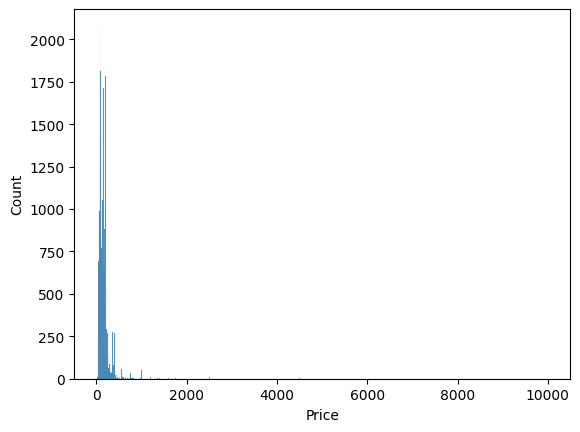

In [26]:
#4
airbnb_df = pd.read_csv('eda_assignment/data/airbnb_hw.csv',low_memory=False)
price_cleaned = []
price = airbnb_df['Price']
for each in price:
  if "," in each:
    comma = each.index(',')
    cleaned_each = each[:comma] + each[comma+1:]
    price_cleaned.append(int(cleaned_each))
  else:
      price_cleaned.append(int(each))
airbnb_df['Price'] = price_cleaned
sns.histplot(airbnb_df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

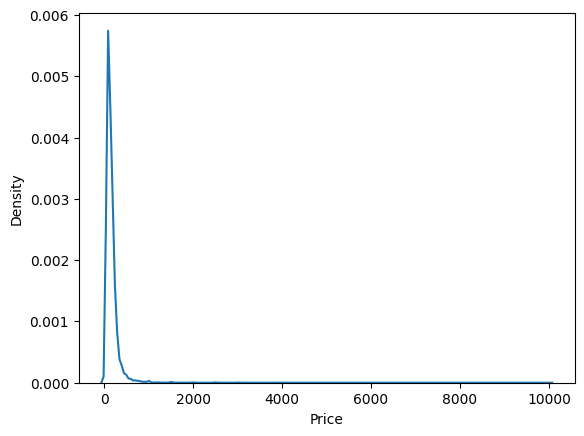

In [27]:
#4 cont
sns.kdeplot(airbnb_df['Price'])

<Axes: xlabel='Price'>

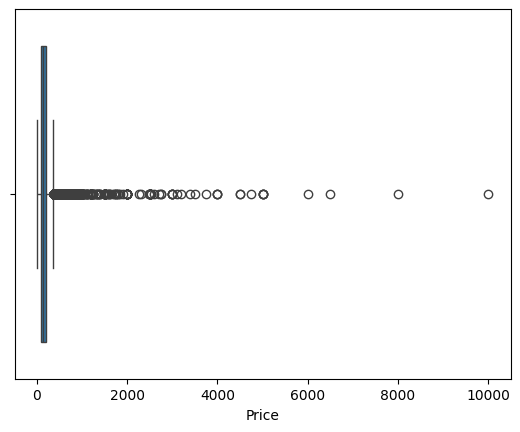

In [29]:
#4 cont
sns.boxplot(data=airbnb_df,x='Price')

In [31]:
#4 cont
stats = airbnb_df['Price'].describe()
print(stats)
std = stats['std']
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = stats['75%']
firstQ = stats['25%']
IQR = thirdQ - firstQ
print('IQR: ', IQR)

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
Variance:  39119.0856734489 

IQR:  115.0


In [ ]:
#The data are badly scaled, it it hyper concentrated in one area and provides too long of tails when it's hard to see the most relevant data
#There are many outliers which are likely the cause of this

<Axes: xlabel='Price Log', ylabel='Count'>

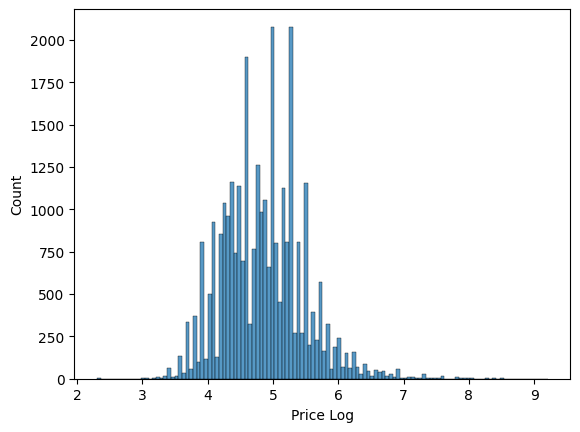

In [36]:
#4 cont
airbnb_df['Price Log'] = np.log(airbnb_df['Price'])
sns.histplot(airbnb_df['Price Log'])

<Axes: xlabel='Price Log', ylabel='Density'>

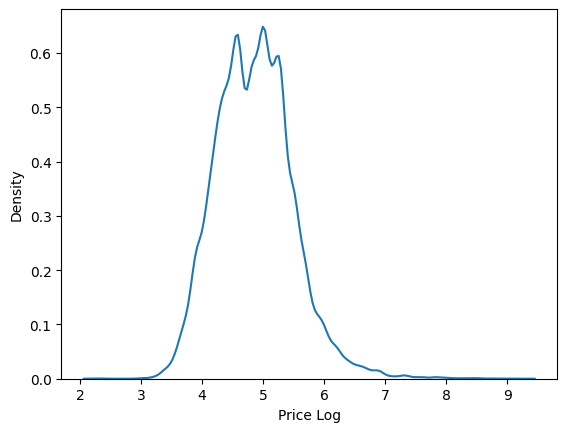

In [38]:
#4 cont
sns.kdeplot(airbnb_df['Price Log'])

<Axes: xlabel='Price Log'>

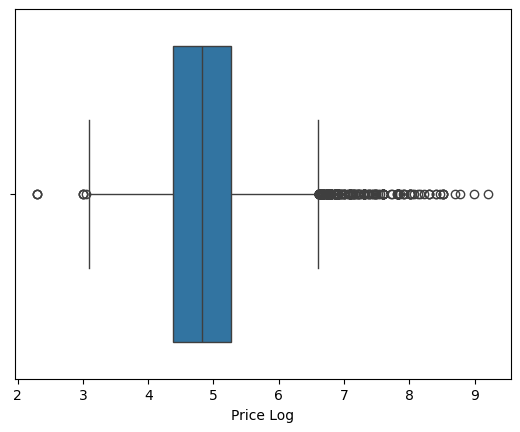

In [39]:
#4 cont
sns.boxplot(data=airbnb_df,x='Price Log')

In [40]:
#4 cont
stats = airbnb_df['Price Log'].describe()
print(stats)
std = stats['std']
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = stats['75%']
firstQ = stats['25%']
IQR = thirdQ - firstQ
print('IQR: ', IQR)

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price Log, dtype: float64
Variance:  0.39401233246163336 

IQR:  0.8909729238898656


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


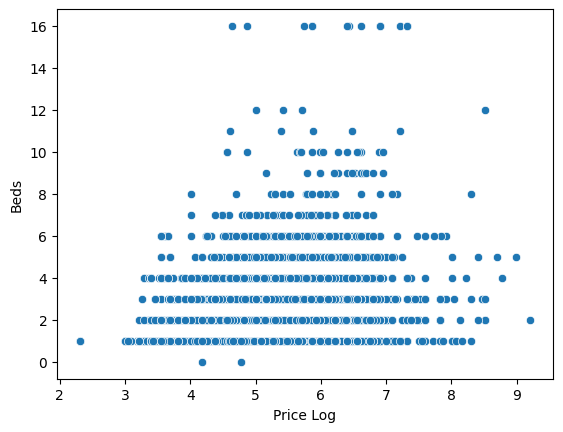

In [42]:
#5 Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional
#on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

sns.scatterplot(data=airbnb_df, x='Price Log', y='Beds')
#This is an interesting scatter plot, since it consists of horizontal lines due to the discrete nature of beds. It looks like there might be a slight
#positive relationship between the 2, but the main thing I'm noticing is that it's more common to have fewer beds regardless of the price.

airbnb_df.groupby('Beds')['Price Log'].describe()
#I definitely notice that the mean price goes up as the bed count goes up as a general trend, with a few minor exceptions. It's also interesting that
#the standard defviation tends to go up somewhat as the bed count increases too, although the relationship between these 2 doesn't
#seem to be quite as strong

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

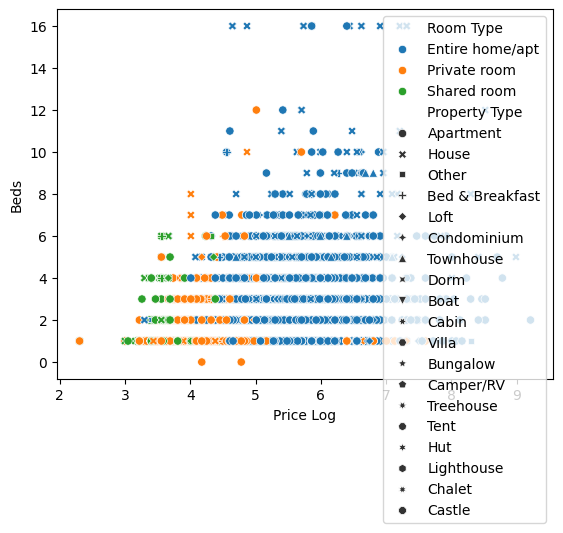

In [48]:
#6 Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see?
#Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average?
#Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

sns.scatterplot(data=airbnb_df, x='Price Log', y='Beds', hue = 'Room Type', style='Property Type')
#I'm noticing that Private and shared rooms tend to be on the cheaper side, regardless of bed count. I also see mostly apartments and houses, based on shape

airbnb_df.loc[:,['Room Type','Price']].groupby('Room Type').describe()
airbnb_df.loc[:,['Property Type','Price']].groupby('Property Type').describe()

#Looking at the desciption grouped by room type, it's apparent that renting th entire home is the most expensive by far based on both mean and median.
#Although, it is worth pointing out that the standard deviation for the entire home is also by far the highest

#Looking at the description grouped by property type, Condos, Lofts, Villas, Townhouses, and Other are the most expensive based on mean. However,
#they all have very high standard deviations as well. Judging by the median, these are also the most 5 expensive, but the different isn't quite as vast.
#I think that median is likely more accurate here, given the very high standard deviations.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [50]:
#1
drill_df = pd.read_csv('eda_assignment/data/drilling_rigs.csv',low_memory=False)
drill_df
#There are 623 observations and 10 variables
#No, numerican variables are read as strings, so in this case, the month variable will have to be converted to a date, and the other numbers will have
#to be converted to integers. Because of this, rows with data not available will also likely have to be filtered out

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991
...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479,101,519,49,18,586,Not Available
619,2024 August,566,19,483,97,521,48,16,586,Not Available
620,2024 September,567,20,486,97,522,50,15,587,Not Available
621,2024 October,568,18,481,101,517,53,15,585,Not Available


In [51]:
#2
#To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed')
drill_df['Month'] = pd.to_datetime(drill_df['Month'], format = 'mixed')
drill_df

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973-01-01,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973-02-01,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973-03-01,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973-04-01,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973-05-01,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991
...,...,...,...,...,...,...,...,...,...,...
618,2024-07-01,564,22,479,101,519,49,18,586,Not Available
619,2024-08-01,566,19,483,97,521,48,16,586,Not Available
620,2024-09-01,567,20,486,97,522,50,15,587,Not Available
621,2024-10-01,568,18,481,101,517,53,15,585,Not Available


<Axes: xlabel='Month'>

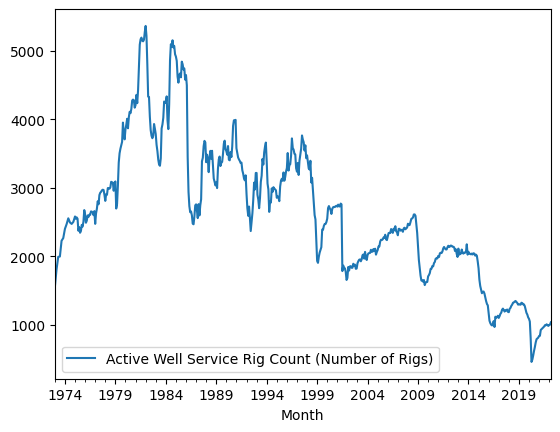

In [63]:
#3
#Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time.
#Make a line plot of this time series. Describe what you see

active_cleaned = []
for each in drill_df['Active Well Service Rig Count (Number of Rigs)']:
  try:
    active_cleaned.append(int(each))
  except:
    active_cleaned.append(each)

drill_df['Active Well Service Rig Count (Number of Rigs)'] = active_cleaned
drill_df = drill_df[drill_df['Active Well Service Rig Count (Number of Rigs)'] != 'Not Available']
drill_df
drill_df.plot(x='Month', y='Active Well Service Rig Count (Number of Rigs)')

<Axes: >

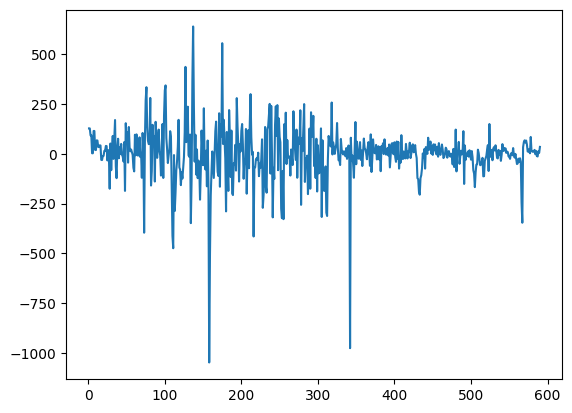

In [64]:
#4
#Instead of levels, we want to look at change over time.
#Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

drill_df = drill_df['Active Well Service Rig Count (Number of Rigs)'].diff()
drill_df.plot(x='Month', y='Active Well Service Rig Count (Number of Rigs)')

#This is interesting because it now incorporates negative values because it's showing change. It's usually hovering around 0, but it goes up to
#over 500 and down to more than -1000

<Axes: xlabel='Month', ylabel='value'>

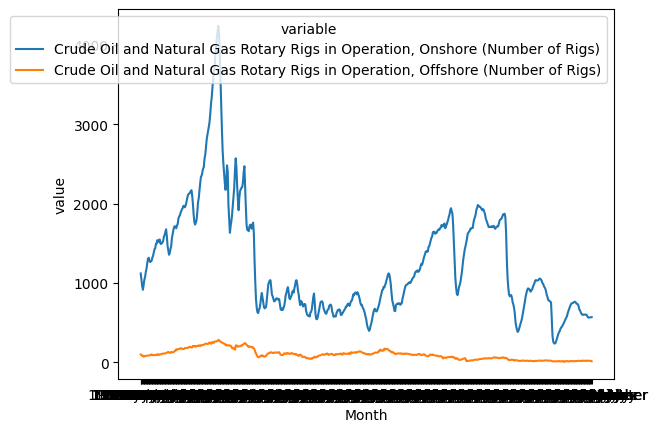

In [75]:
#5
#The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.
drill_df = pd.read_csv('eda_assignment/data/drilling_rigs.csv',low_memory=False)
onshore_cleaned = []
for each in drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)']:
  try:
    onshore_cleaned.append(int(each))
  except:
    onshore_cleaned.append(each)
drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'] = onshore_cleaned
drill_df = drill_df[drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'] != 'Not Available']
offshored_cleaned = []
for each in drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)']:
  try:
    offshored_cleaned.append(int(each))
  except:
    offshored_cleaned.append(each)
drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'] = offshored_cleaned
drill_df = drill_df[drill_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'] != 'Not Available']
drill_df_filtered = drill_df[['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)']]
drill_df_filtered
melted_drill_df = drill_df_filtered.melt(id_vars=['Month'])
melted_drill_df
fig = sns.lineplot(data=melted_drill_df,x='Month',y='value',hue='variable')
fig